In [1]:
"""Importação das bilbiotecas"""

from pandas import read_csv # Leitura de Dados
from datetime import datetime, timedelta # Manipulação de datas
from re import findall # Manipulação de strings
from seaborn import heatmap # Plotagem de mapas de calor
import matplotlib.pyplot as plt #Visualização de dados

In [ ]:
"""Caminho dos Dados para EDA"""
data_path = '..\data\dados_processados\liver_cirrhosis_v1.csv'

In [3]:
"""Lendo os Dados"""

df = read_csv(data_path)

### Aqui, não utilizo a última coluna, que seria a de estágio, pois ela se caracteriza como categórica

In [4]:
"""Colunas numéricas"""

colunas_numericas = list(df.describe().columns)[:-1] #Estágio se caracteriza como categórica
colunas_numericas

['Numero_dias',
 'Idade',
 'Bilirrubina(mg/dl)',
 'Colesterol(mg/dl)',
 'Albumina(gm/dl)',
 'Cobre_Urina(ug/dia)',
 'Fosfatase_Alcalina (U/L)',
 'Aspartato_Aminotransferase(U/L)',
 'Triglicerídeos(mg/dl)',
 'Plaquetas(ml/1000)',
 'Tempo_de_Protrombina(s)']

Como a idade dos pacientes está disposta em dias, é preciso convertê-las para ano.

In [5]:
"""Função para transformar idade de dias para anos"""

def days_to_year(days) -> int:
    
    start = datetime.now() - timedelta(days=days)
    years = datetime.now().year - start.year

    return years

In [6]:
df['Idade_ano'] = df['Idade'].apply(days_to_year)
df['Idade_ano']

0       51
1       54
2       33
3       45
4       60
        ..
9632    49
9633    64
9634    67
9635    58
9636    79
Name: Idade_ano, Length: 9637, dtype: int64

In [7]:
"""Atualizando colunas numéricas"""
df.drop('Idade', axis=1, inplace=True)
colunas_numericas.remove('Idade')
colunas_numericas.append('Idade_ano')

### **Descrição geral dos dados**

O método `.describe()` retorna estatísticas gerais das colunas numéricas. São elas:

* **média (mean):** A média da variável
* **desvio padrão (std):** Desvio padrão da varíavel
* **valor mínimo (min):** Valor mínimo encontrado da variável 
* **primeiro quartil (25%)**: Indica que 25% dos dados estão abaixo do valor indicado
* **segundo quartil (50%)**: Indica que 50% dos dados estão abaixo do valor indicado
* **terceiro quartil (75%)**: Indica que 75% dos dados estão abaixo do valor indicado
* **valor máximo (max)**: Valor máximo encontrado da variável

In [53]:
"""Estatísticas gerais"""

# Coluna count foi removida pois 
# essa estatística não é adequada para variáveis numéricas

display(df[colunas_numericas].describe().drop('count', axis=0))

,Numero_dias,Bilirrubina(mg/dl),Colesterol(mg/dl),Albumina(gm/dl),Cobre_Urina(ug/dia),Fosfatase_Alcalina (U/L),Aspartato_Aminotransferase(U/L),Triglicerídeos(mg/dl),Plaquetas(ml/1000),Tempo_de_Protrombina(s),Idade_ano
mean,1911.276123,3.228598,371.721588,3.496127,97.025914,1973.608523,122.309516,123.597732,253.791919,10.713237,50.562208
std,1093.543838,4.512662,197.841842,0.382358,73.116315,1827.226621,47.639241,55.206737,95.749689,0.922098,10.111428
min,41.000000,0.300000,120.000000,1.960000,4.000000,289.000000,26.350000,33.000000,62.000000,9.000000,26.000000
25%,1103.000000,0.800000,271.000000,3.290000,51.000000,1031.000000,89.900000,93.000000,188.000000,10.000000,43.000000
50%,1690.000000,1.300000,369.510563,3.520000,97.648387,1713.000000,122.556346,124.702128,249.000000,10.600000,51.000000
75%,2598.000000,3.300000,369.510563,3.760000,102.000000,1982.655769,134.850000,125.000000,307.000000,11.100000,57.000000
max,4795.000000,28.000000,1775.000000,4.640000,588.000000,13862.400000,457.250000,598.000000,721.000000,18.000000,79.000000


'Coluna count foi removida pois \nessa estatística não é adequada para variáveis numéricas'

### **Boxplot´s**

O que é um boxplot?

Um boxplot é um modelo de gráfico para 
analisar o resumo da distribuição
estatística de uma variável.

**Características**
* A linha central representa a mediana
* A caixa inferior é o 1º quartil e a superior é o 3º quartil
* A linha inferior é o limite inferior (valor mínimo)
* A linha superior é o limite superior, mas não o valor máximo
* Os pontos além da linha superior ou abaixo da inferior são outliers

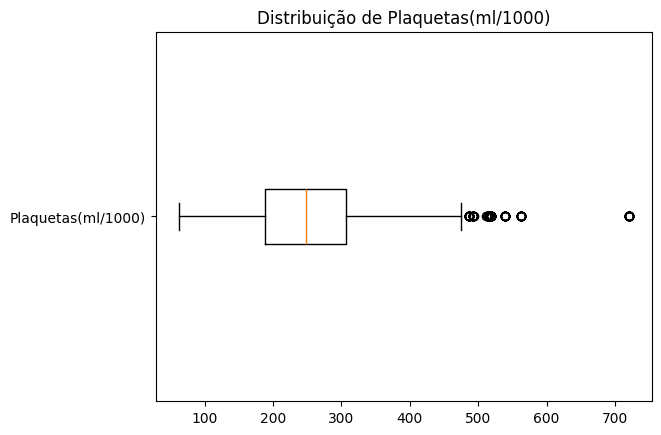

In [54]:
#EXEMPLO
plt.boxplot(
    df['Plaquetas(ml/1000)'], # Valores da variável,
    labels=['Plaquetas(ml/1000)'], # Variável,
    vert=False # Gráfico horizontal para facilitar a leitura das labels
    )
plt.title(f"Distribuição de {df[['Plaquetas(ml/1000)']].columns[0]}")
plt.show()

### **Histogramas**

Um histograma é um tipo de gráfico que mostra a distribuição de uma variável contínua. Ele agrupa os dados em intervalos (bins) e conta a frequência de valores que caem em cada intervalo.

**Características**
* **Barras Verticais:** Cada barra representa um intervalo de valores (bin). A altura da barra indica a frequência (ou contagem) dos valores nesse intervalo.

* **Eixo X (Horizontal):** Mostra os intervalos de valores (bins) da variável contínua.

* **Eixo Y (Vertical):** Mostra a frequência (contagem) de valores em cada intervalo.

* **Tamanho dos Intervalos (Bins):** O número de bins pode ser ajustado para mudar a granularidade do histograma. Mais bins fornecem mais detalhes, enquanto menos bins dão uma visão mais geral.

* **Forma da Distribuição:** A forma do histograma (simétrica, enviesada à direita/esquerda, etc.) pode dar insights sobre a distribuição dos dados.

* **Áreas de Frequência Alta e Baixa:** Áreas onde as barras são altas indicam alta frequência de valores, enquanto áreas com barras baixas indicam baixa frequência.

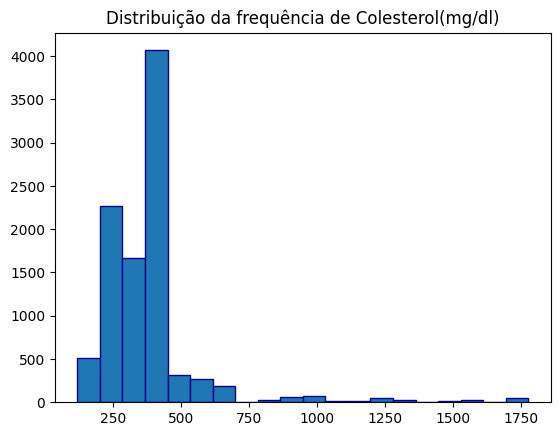

In [77]:
"""Análises com histogramas"""
plt.hist(df['Colesterol(mg/dl)'],bins=20,edgecolor='darkblue')
plt.title(f'Distribuição da frequência de {df[['Colesterol(mg/dl)']].columns[0]}')
plt.show()

### Plotando boxplot para analisar a distribuição das variáveis e existência de outliers

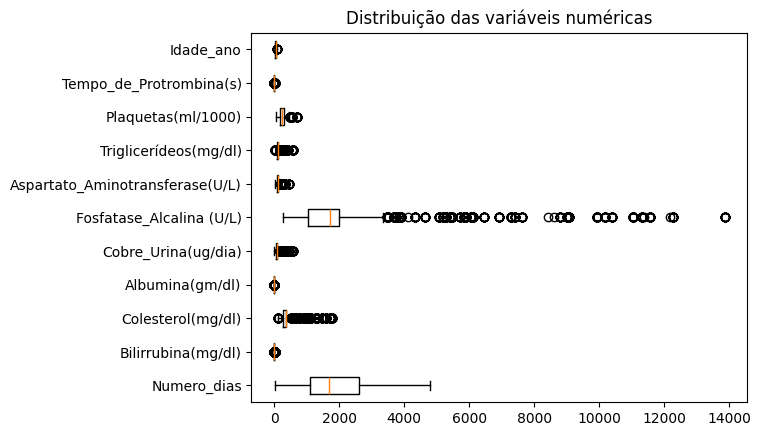

In [11]:
plt.boxplot(
    df[colunas_numericas],
    labels = df[colunas_numericas].columns,
    vert=False
    )
plt.title('Distribuição das variáveis numéricas')
plt.show()

<b>A existência de muitas variáveis de elementos sanguíneos
tornaria a EDA bastante extensa, por isso, definimos
com base em suas importâncias para avaliação de um quadro
de cirrose, variáveis.<\b>

* Fosfatase alcalina
* Albumina
* Tempo de protombina

### **Análise da Fosfatase alcalina**

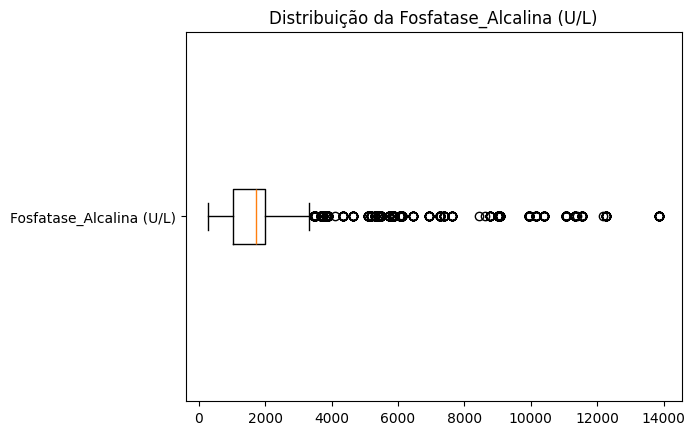

In [66]:
"""Análise com Boxplot"""
plt.boxplot(
    df['Fosfatase_Alcalina (U/L)'],
    labels=['Fosfatase_Alcalina (U/L)'],
    vert=False
)
plt.title(f'Distribuição da {df[['Fosfatase_Alcalina (U/L)']].columns[0]}')
plt.show()

Perceba que essa é a variável que mais possui outliers registrados.
Isso fica claro quando comparado com as outras, no gráfico anterior

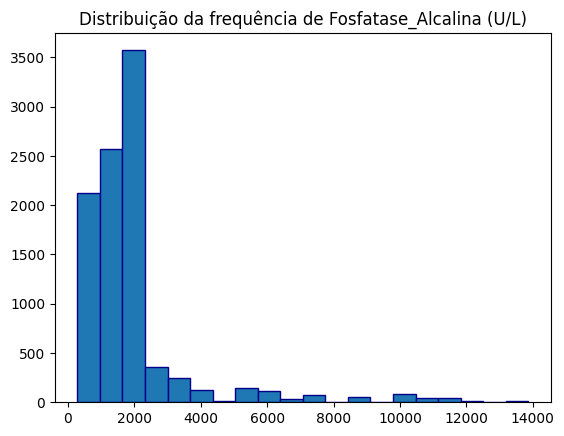

In [67]:
"""Análises com histogramas"""
plt.hist(df['Fosfatase_Alcalina (U/L)'],bins=20,edgecolor='darkblue')
plt.title(f'Distribuição da frequência de {df[['Fosfatase_Alcalina (U/L)']].columns[0]}')
plt.show()

Perceba que essa variável é enviesada para a esquerda.

### **Análise da Albumina**

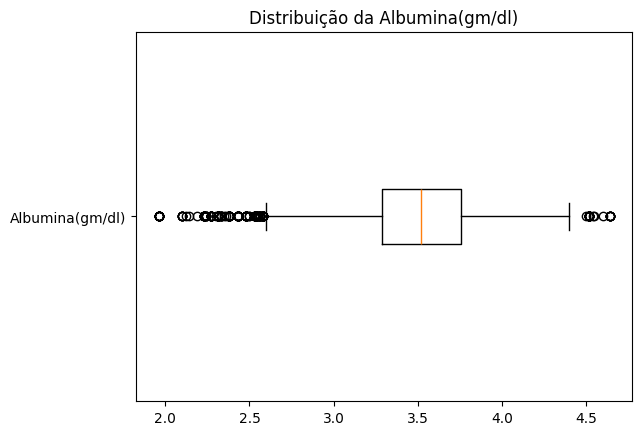

In [14]:
"""Análise com Boxplots"""

plt.boxplot(
    df['Albumina(gm/dl)'],
    labels=df[['Albumina(gm/dl)']].columns,
    vert=False
)
plt.title(f'Distribuição da {df[['Albumina(gm/dl)']].columns[0]}')
plt.show()

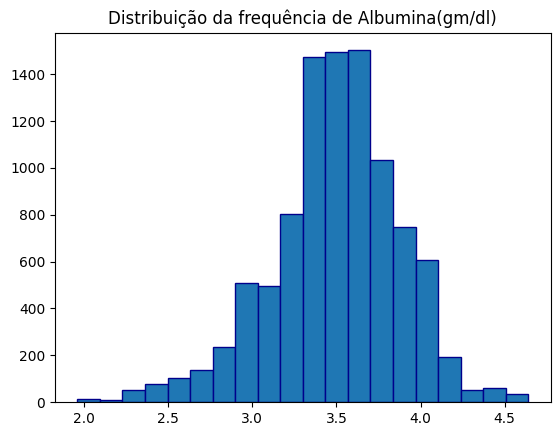

In [68]:
"""Análises com histogramas"""

plt.hist(df['Albumina(gm/dl)'],bins=20,edgecolor='darkblue')
plt.title(f'Distribuição da frequência de {df[['Albumina(gm/dl)']].columns[0]}')
plt.show()

Já essa, possui uma distribuição mais normalizada.

### **Tempo de protombina**

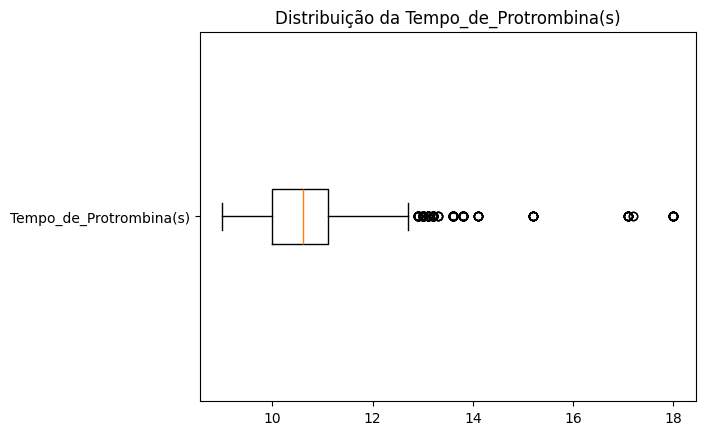

In [16]:
"""Análise com Boxplot"""

plt.boxplot(
    df['Tempo_de_Protrombina(s)'],
    labels=df[['Tempo_de_Protrombina(s)']].columns,
    vert=False
)
plt.title(f'Distribuição da {df[['Tempo_de_Protrombina(s)']].columns[0]}')
plt.show()

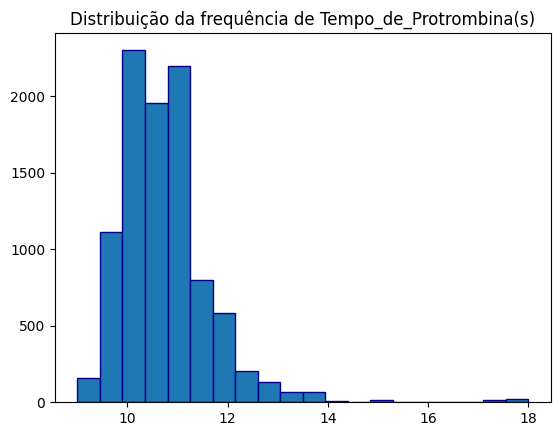

In [70]:
"""Análise com Histogramas"""

plt.hist(df['Tempo_de_Protrombina(s)'],bins=20,edgecolor='darkblue')
plt.title(f'Distribuição da frequência de {df[['Tempo_de_Protrombina(s)']].columns[0]}')
plt.show()

### **Analisando Idades**

A análise das idades é de extrema importância para identificar qualquer tipo de viés nos dados. É a melhor coluna dos dados numéricos para analisar a distribuição dos pacientes.

Por exemplo, se percebemos uma frequência maior de pessoas mais novas, percebemos que os dados estão enviesados, pois é de censo comum que cirrose geralmente acomete pessoas mais velhas, pois elas bebem há mais tempo.

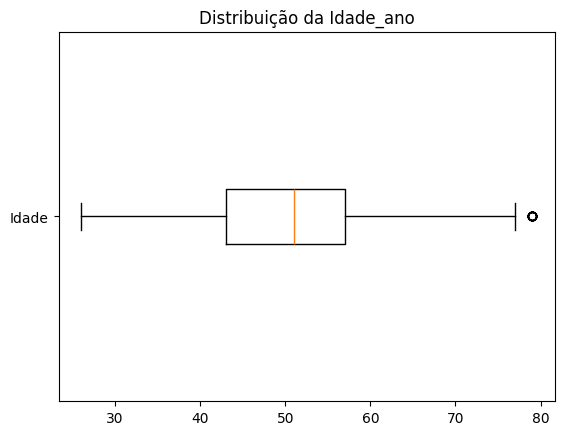

In [73]:
"""Análise com Boxplot"""

plt.boxplot(
    df['Idade_ano'],
    labels=['Idade'],
    vert=False
)
plt.title(f'Distribuição da {df[['Idade_ano']].columns[0]}')
plt.show()

Perceba que os dados estão bem distribuídos e há apenas um outlier identificado, mostrando uma boa consistência.

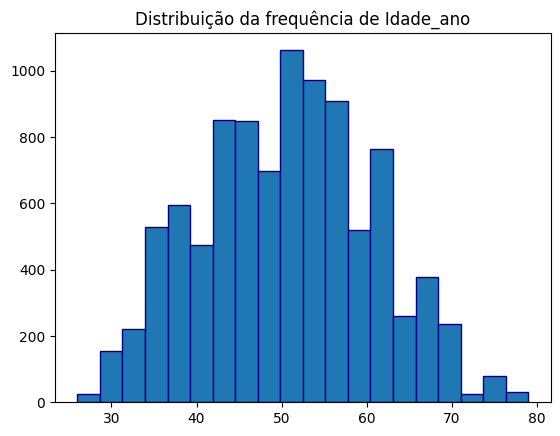

In [74]:
"""Análise com Histogramas"""

plt.hist(df['Idade_ano'],bins=20,edgecolor='darkblue')
plt.title(f'Distribuição da frequência de {df[['Idade_ano']].columns[0]}')
plt.show()

Mais uma vez, outra maneira de visualizar a distribuição dos dados, e perceba que eles são normalmente distribuídos.

### **Investigando correlações**

Correlação consiste na interação entre duas variáveis, ou seja, se eu quero investigar a correlação entre duas variáveis, devo analisar como uma se comporta em função da outra, para descobrir se elas se influenciam.

Os tipos de correlações podem ser:

* Direta (Uma sobe, outra também sobe)
* Indireta (Uma sobe, outra desce)

Além disso é possível medir a força dessas correlações, ou seja, metrificar o quanto elas se relacionam. Para isso, calculamos o coeficente de correlação, que varia de -1 a 1. Quanto mais próximo de uma das extremidades mais a correlação é forte, caso o contrário, é fraca. Coeficientes negativos são correlações indiretas e positivos são correlações diretas.

In [79]:
"""Calculando a correlação entre as variáveis"""

"""O método .corr() retorna uma matriz com os coeficientes
de correlação das variáveis."""

df[colunas_numericas].corr()

,Numero_dias,Bilirrubina(mg/dl),Colesterol(mg/dl),Albumina(gm/dl),Cobre_Urina(ug/dia),Fosfatase_Alcalina (U/L),Aspartato_Aminotransferase(U/L),Triglicerídeos(mg/dl),Plaquetas(ml/1000),Tempo_de_Protrombina(s),Idade_ano
Numero_dias,1.000000,-0.360158,-0.128592,0.356754,-0.282194,0.103289,-0.172729,-0.122716,0.076867,-0.095059,-0.038835
Bilirrubina(mg/dl),-0.360158,1.000000,0.352127,-0.261299,0.415027,0.132425,0.352460,0.348504,-0.057867,0.170697,0.033030
Colesterol(mg/dl),-0.128592,0.352127,1.000000,-0.062756,0.145983,0.117626,0.322665,0.267340,0.021653,0.002592,-0.016684
Albumina(gm/dl),0.356754,-0.261299,-0.062756,1.000000,-0.168683,-0.112587,-0.147348,-0.103031,0.107514,-0.156307,-0.078614
Cobre_Urina(ug/dia),-0.282194,0.415027,0.145983,-0.168683,1.000000,0.184010,0.285076,0.239766,-0.041500,0.101950,0.023044
Fosfatase_Alcalina (U/L),0.103289,0.132425,0.117626,-0.112587,0.184010,1.000000,0.137345,0.153644,0.010288,0.064008,0.019773
Aspartato_Aminotransferase(U/L),-0.172729,0.352460,0.322665,-0.147348,0.285076,0.137345,1.000000,0.119134,-0.037032,0.072822,-0.004358
Triglicerídeos(mg/dl),-0.122716,0.348504,0.267340,-0.103031,0.239766,0.153644,0.119134,1.000000,-0.009481,0.022054,0.024710
Plaquetas(ml/1000),0.076867,-0.057867,0.021653,0.107514,-0.041500,0.010288,-0.037032,-0.009481,1.000000,-0.129620,-0.110865
Tempo_de_Protrombina(s),-0.095059,0.170697,0.002592,-0.156307,0.101950,0.064008,0.072822,0.022054,-0.129620,1.000000,0.058963


### **Mapas de calor**

O que é um mapa de calor?

Um mapa de calor é uma representação gráfica de dados onde os valores são exibidos em uma matriz ou tabela e são representados por cores. É uma ferramenta eficaz para visualizar padrões, variâncias e correlações em conjuntos de dados complexos.

### **Características**

- **Cores**: As cores representam os valores dos dados. Geralmente, uma paleta de cores é usada para mostrar a intensidade dos valores, onde cores mais escuras ou mais quentes (vermelho, laranja) representam valores mais altos e cores mais claras ou mais frias (azul, verde) representam valores mais baixos.

- **Matriz**: O mapa de calor é organizado como uma matriz, onde cada célula da matriz corresponde a um valor de dados.

- **Eixos**: Os eixos do mapa de calor geralmente representam diferentes categorias ou dimensões dos dados.

- **Legenda**: Uma barra de cores ou legenda é frequentemente incluída para mostrar a escala de valores correspondentes às cores.


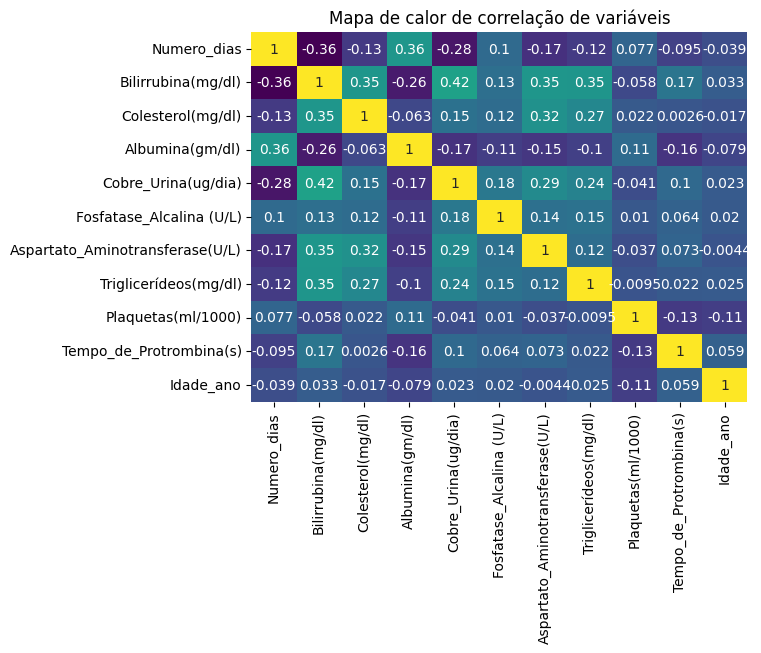

In [19]:
#EXEMPLO
heatmap(
    df[colunas_numericas].corr(), # Matriz de correlações
    annot=True, # Escreve os valores dos coeficientes
    cmap='viridis', # Paleta de cores
    cbar=False # Desativa a legenda
    )
plt.title("Mapa de calor de correlação de variáveis")
plt.show()

A princípio, os dados não apresentaram nenhuma correlação forte, mas vou selecionar as top 3 mais correlacionadas para se aprofundar.

Porém, como há diferença de unidades de medida nas variáveis, há a possibilidade de que após uma normalização dos dados, seja possível calcular correlações mais fortes.

* Cobre na Urina X Bilirrubina
* Abulmina X Dias de tratamento
* Bilirrubina X Dias de tratamento

Perceba também que Abulmina e Bilirrubina se correlacionam com a mesma força em relaçao a Dias de tratamento, porém de maneira inversa.

### **Cobre na Urina X Bilirrubina**

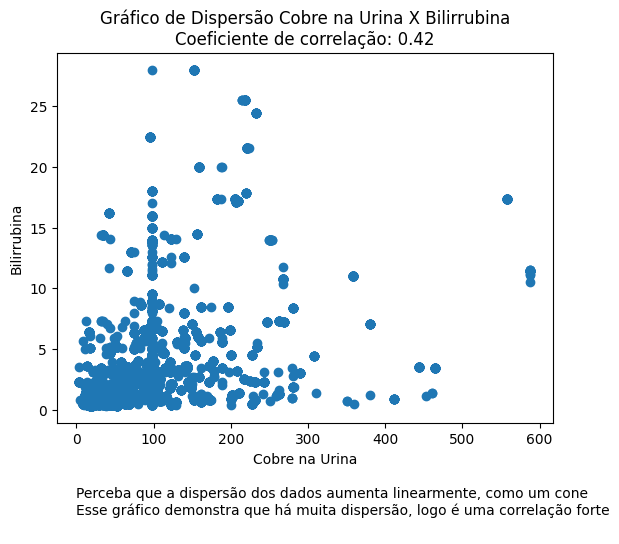

In [20]:
"""Gráfico de Dispersão"""

plt.scatter(
    df['Cobre_Urina(ug/dia)'],
    df['Bilirrubina(mg/dl)']
)

plt.title(
    'Gráfico de Dispersão Cobre na Urina X Bilirrubina\n'
    f'Coeficiente de correlação: {df['Cobre_Urina(ug/dia)'].corr(df['Bilirrubina(mg/dl)']):.2f}')
plt.xlabel('Cobre na Urina')
plt.ylabel('Bilirrubina')
plt.text(
    0,-10,
    'Perceba que a dispersão dos dados aumenta linearmente, como um cone\n'
    'Esse gráfico demonstra que há muita dispersão, logo é uma correlação forte\n'
)
plt.show()

### **Abulmina X Dias de tratamento**

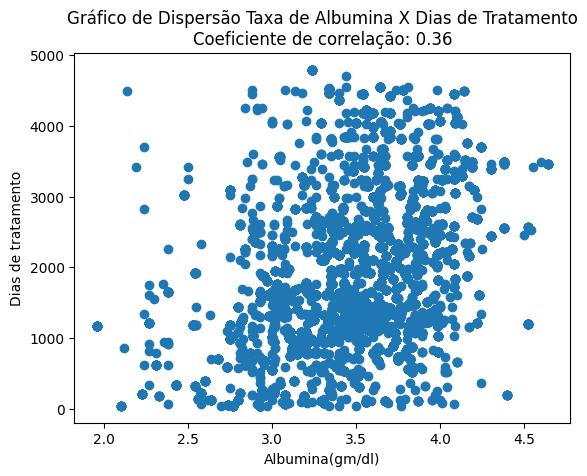

In [80]:
"""Gráfico de Dispersão"""

plt.scatter(
    df['Albumina(gm/dl)'],
    df['Numero_dias']
)

plt.title(
    'Gráfico de Dispersão Taxa de Albumina X Dias de Tratamento\n'
    f'Coeficiente de correlação: {df['Albumina(gm/dl)'].corr(df['Numero_dias']):.2f}')
plt.xlabel('Albumina(gm/dl)')
plt.ylabel('Dias de tratamento')
plt.show()

Como a outra correlação selecionada possui mesma força porém inversa, o gráfico será semelhante porém invertido

## **Testando Hipóteses**

### **Analisando a relação de Cobre na Urina por estágio**

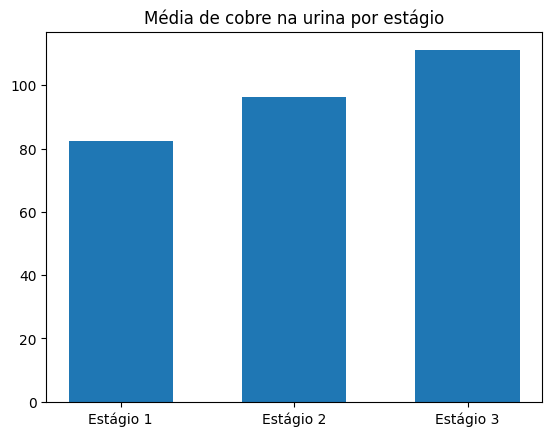

In [35]:
media_cobre_estagio = df.groupby('Estágio')['Cobre_Urina(ug/dia)'].mean().reset_index()
map = {
    1:'Estágio 1',
    2:'Estágio 2',
    3:'Estágio 3'
}

plt.bar(
    media_cobre_estagio['Estágio'].map(map), 
    media_cobre_estagio['Cobre_Urina(ug/dia)'],
    width=0.6
)
plt.title('Média de cobre na urina por estágio')
plt.show()

Perceba que o nível de cobre na urina aumenta conforme o estágio também, o que pode ser um agravador da doença.

### **Analisando relação entre Plaquetas por estágio e morte**

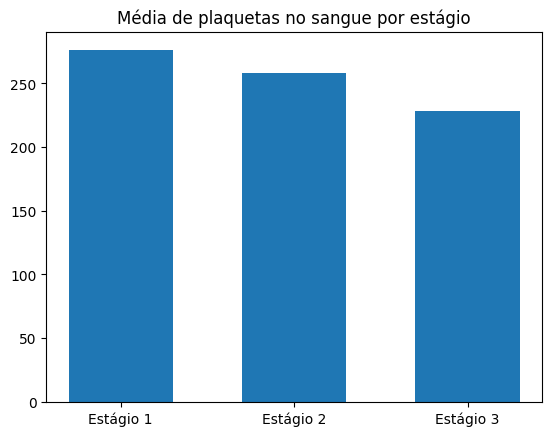

In [48]:
media_plaqueta_estagio = df.groupby('Estágio')['Plaquetas(ml/1000)'].mean().reset_index()
map = {
    1:'Estágio 1',
    2:'Estágio 2',
    3:'Estágio 3'
}

plt.bar(
    media_plaqueta_estagio['Estágio'].map(map), 
    media_plaqueta_estagio['Plaquetas(ml/1000)'],
    width=0.6
)
plt.title('Média de plaquetas no sangue por estágio')
plt.show()

Perceba que conforme o estágio aumenta, a taxa de plaquetas diminui, acarretando uma piora na coagulação sanguínea.

### **Média de Plaquetas por fim de tratamento**

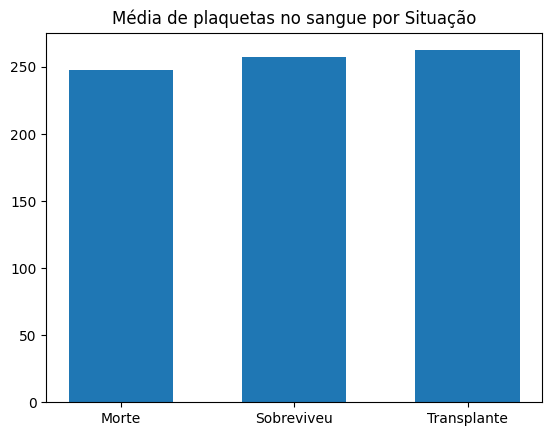

In [52]:
media_plaquetas_situacao = df.groupby('Situação')['Plaquetas(ml/1000)'].mean().reset_index()
map = {
    1:'Estágio 1',
    2:'Estágio 2',
    3:'Estágio 3'
}

plt.bar(
    media_plaquetas_situacao['Situação'], 
    media_plaquetas_situacao['Plaquetas(ml/1000)'],
    width=0.6
)
plt.title('Média de plaquetas no sangue por Situação')
plt.show()

Os pacientes translantados apresentaram maior taxa de plaquetas após o fim do tratamento, revelando talvez, uma boa eficácia do procedimento.